In [1]:
import scipy.sparse as sparse
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as m

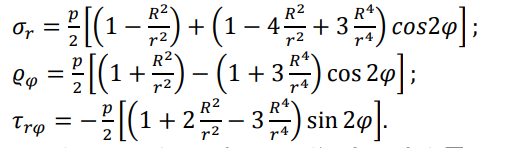

In [2]:
def s_r(r,R,fi,p):
    rr = R/r
    return p*((1-rr**2)+m.cos(2*fi)*(1-4*rr**2 +3*rr**3))/2

In [3]:
def s_fi(r,R,fi,p):
    rr = R/r
    return p*((1+rr**2)-m.cos(2*fi)*(1+3*rr**3))/2

In [4]:
def s_fir(r,R,fi,p):
    rr = R/r
    return -p*(m.sin(2*fi)*(1+2*rr**2-3*rr*4))/2

In [5]:
def nom_main(r,R,fi,p):
    NapM = np.matrix([[s_r(r,R,fi,p),s_fir(r,R,fi,p)],[s_fir(r,R,fi,p),s_fi(r,R,fi,p)]])
    Sig,s = np.linalg.eig(NapM)
    ans = np.linalg.norm(Sig)
    return ans

In [6]:
max_sig = 0
R = 0.05
fi_m = -1;
r_m = -1;
r = np.array([0.05+i*0.0125 for i in range(4,41)])
fi = np.array([i*np.pi/50 for i in range(100)])
for i in r:
    for j in fi:
        sig_in = nom_main(i,R,j,1000)
        if sig_in > max_sig:
            max_sig = sig_in
            fi_m = j
            r_m = i

print(max_sig,'x:',r_m*m.cos(fi_m),'y:',r_m*m.sin(fi_m))

3265.49590229962 x: 0.06845471059286887 y: 0.07289686274214116


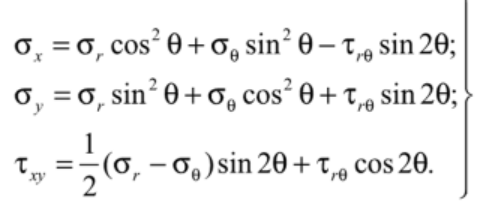

In [7]:
def nom_main_D(r,R,fi,p):
    sr = s_r(r,R,fi,p)
    sfir = s_fir(r,R,fi,p)
    sfi = s_fi(r,R,fi,p)
    sig_x = sr*m.cos(fi)**2 + sfi*m.sin(fi)**2 - sfir*m.sin(2*fi)
    sig_y = sr*m.sin(fi)**2 + sfi*m.cos(fi)**2 + sfir*m.sin(2*fi)
    sif_xy = (sr-sfi)*m.sin(2*fi)/2 + sfir*m.cos(2*fi)
    NapM = np.matrix([[sr,sfir],[sfir,sfi]])
    Sig,s = np.linalg.eig(NapM)
    ans = np.linalg.norm(Sig)
    return ans

In [8]:
max_sig = 0
R = 0.05
fi_m = -1;
r_m = -1;
r = np.array([0.05+i*0.0125 for i in range(4,41)])
fi = np.array([i*np.pi/50 for i in range(1000)])
for i in r:
    for j in fi:
        sig_in = nom_main_D(i,R,j,100)
        if sig_in > max_sig:
            max_sig = sig_in
            fi_m = j
            r_m = i

print(max_sig,r_m*m.cos(fi_m),r_m*m.sin(fi_m))

326.5495902299621 -0.06845471059286933 -0.07289686274214073
